In [1]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 46.8 MB/s 


In [2]:
import re
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import platform                
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/project_ie/

/content/drive/MyDrive/project_ie


In [ ]:
# mecab 다운

# konlpy & mecab install
import os
# install konlpy, jdk, JPype
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

     |████████████████████████████████| 88 kB 6.1 MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp37-cp37m-linux_x86_64.whl size=2685540 sha256=cde3d29b18c23e746be4b3462c59e2579ef363e8ae13a796b77da4eb9ce73086
  Stored in directory: /root/.cache/pip/wheels/e7/d1/09/f55dca0203b0691945bdf0f63d486a0b4d4e5ec4bd78a2502e
Successfully built JPype1-py3


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  6252k      0 --:--:-- --:--:-- --:--:-- 6252k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.in
mecab-0.996-ko-0.9.2/man/
mecab-0.996-ko-0.9.2/man/Makefile.am
mecab-0.996-ko-0.9.2/man/mecab.1
mecab-0.996-ko-0.9.2/man/Makefile.in
mecab-0.996-ko-0.9.2/mecab.iss.in
mecab-0.996-ko-0.9.2/config.guess
mecab-0.996-ko-0.9.2/README
mecab-0.996-ko-0.9.2/COPYING
mecab-0.996-ko-0.9.2/CHANGES.md
mecab-0.996-ko-0.9.2/README.md
mecab-0.996-ko-0.9.2/INSTALL
mecab-0.996-ko-0.9.2/con

In [ ]:
# import jpype

# p = jpype.getDefaultJVMPath()

# jpype.startJVM( p )

In [9]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','공부','과정',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','영상','진행','학교','어디','문제',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','어떻게','추천','좋은','다른','학생','무료','필요','대학교','대학','전공','클릭',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한','라면','어떤','본인','먼저','지금','독취','저작','카페','이유','콘텐츠','감사',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','분야','같은','시스템','경우','시간','소개','많은','내용','있고','있으며','때문','통해','정말']

## 데이터 불러오기

In [6]:
jk = pd.read_csv('jk.csv')
cafe = pd.read_csv('cafe.csv')
orbi = pd.read_csv('orbi.csv')

In [13]:
blog = pd.read_csv('Naver_Blog.csv')
kin = pd.read_csv('Naver_Kin.csv')
dc = pd.read_csv('Dcinside.csv')
yt = pd.read_csv('Youtube.csv')

In [ ]:
# from konlpy.tag import Mecab
# tokenizer = Mecab()
# def Mecab_tokenizer(sent):
#     words = tokenizer.pos(sent, join=True)
#     words = [w for w in words if ('NNG' in w or 'XR' in w or 'VA' in w or 'VV' in w)] # 명사, 어근, 형용사, 동사
#     words = [w for w in words if w not in stopwords]
#     return words

In [37]:
def word_cloud(data):
  comment = data['content']
  comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  comment = comment.dropna()
  okt = Okt()
  morphs = []
  for sentence in comment:
    morphs.append(okt.pos(sentence, stem=True))
  word_list = []
  for i in morphs:
      for word, tag in i:
          if tag in['Noun']:
              word_list.append(word)

  new_word_list = []
  for word in word_list:
    if word not in stopwords and len(word)>1 :
      new_word_list.append(word)

  count = Counter(new_word_list)
  words = (dict(count.most_common()))
  wordcloud = WordCloud(width=1000, height=600, background_color="white", font_path=path)
  cloud = wordcloud.generate_from_frequencies(words)
  plt.figure(figsize=(10,8))
  plt.axis('off')
  plt.imshow(cloud)
  plt.show()

In [ ]:
# def word_cloud_mecab(data):
#   comment = data['content']
#   comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#   comment = comment.dropna()
#   tokenizer = Mecab()
#   morphs = []
#   for sentence in comment:
#     morphs.append(tokenizer.pos(sentence))
#   new_word_list = []
#   for sentence in morphs:
#     for word, tag in sentence:
#       if tag in ('NNG' or 'XR' or 'VA' or 'VV'): # 명사, 어근, 형용사, 동사
#         if word not in stopwords and len(word)>1 :
#           new_word_list.append(word)
#   count = Counter(new_word_list)
#   words = (dict(count.most_common()))
#   wordcloud = WordCloud(width=1000, height=600, background_color="white", font_path=path)
#   cloud = wordcloud.generate_from_frequencies(words)
#   plt.figure(figsize=(10,8))
#   plt.axis('off')
#   plt.imshow(cloud)
#   plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


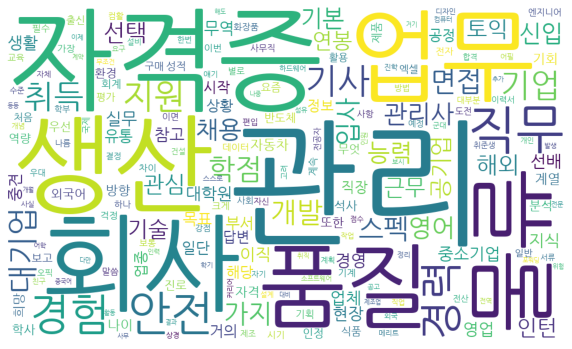

In [38]:
word_cloud(jk)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


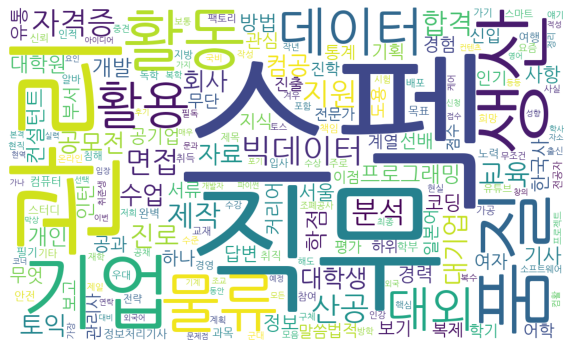

In [39]:
word_cloud(cafe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


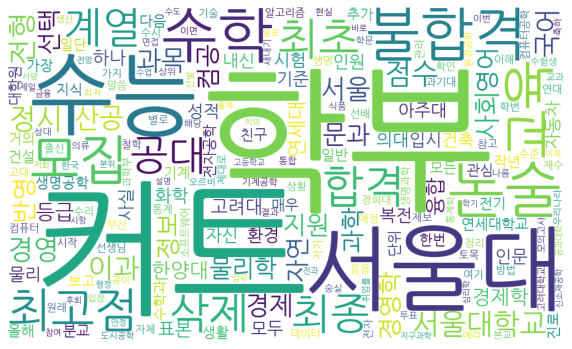

In [40]:
word_cloud(orbi)

In [41]:
cj = cafe.append(jk)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


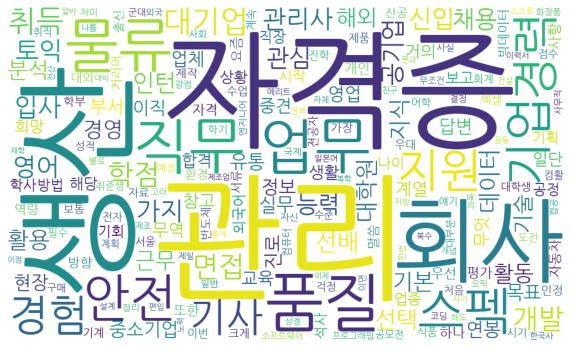

In [42]:
word_cloud(cj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


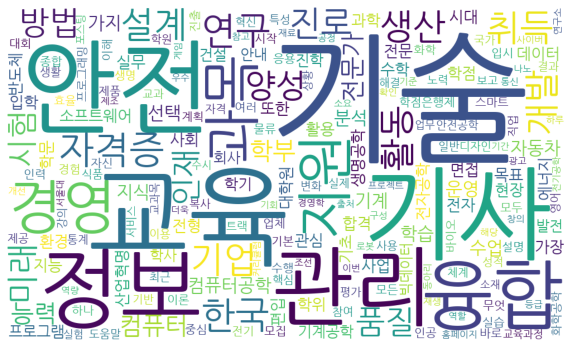

In [43]:
word_cloud(blog)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


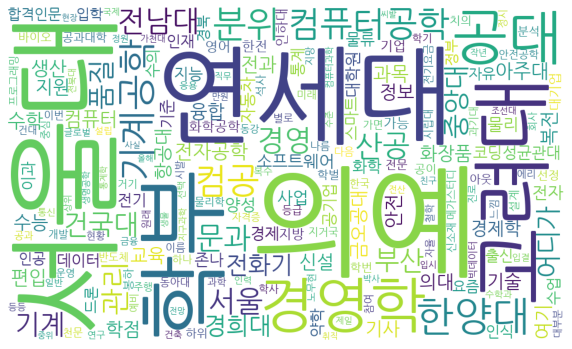

In [44]:
word_cloud(dc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


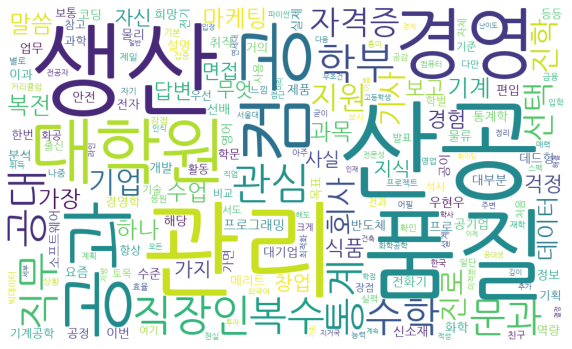

In [45]:
word_cloud(yt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


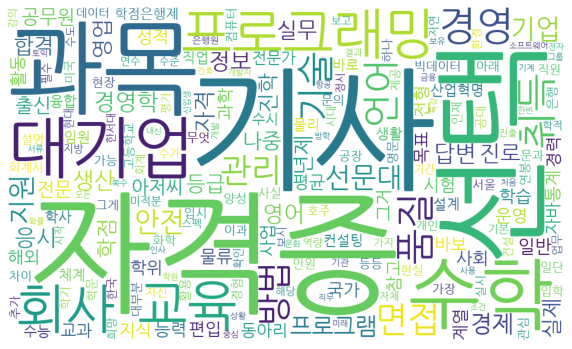

In [46]:
word_cloud(kin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


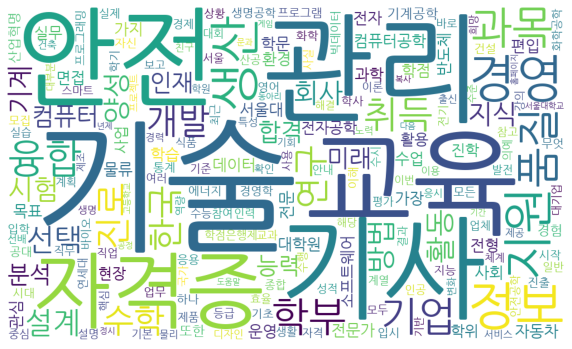

In [47]:
word_cloud(df)

In [ ]:
# def word_cloud(data):
#   comment = data['content']
#   comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#   comment = comment.dropna()
#   okt = Okt()
#   morphs = []
#   for sentence in comment:
#     morphs.append(okt.pos(sentence))
#   word_list = []
#   for i in morphs:
#       for word, tag in i:
#           if tag in['Noun']:
#               word_list.append(word)
#           elif tag in['Adjective']:
#               word_list.append(word)
#   new_word_list = []
#   for word in word_list:
#     if word not in stopwords and len(word)>1 :
#       new_word_list.append(word)

#   count = Counter(new_word_list)
#   words = (dict(count.most_common()))
#   wordcloud = WordCloud(width=1000, height=600, background_color="white", font_path=path)
#   cloud = wordcloud.generate_from_frequencies(words)
#   plt.figure(figsize=(10,8))
#   plt.axis('off')
#   plt.imshow(cloud)
#   plt.show()

In [16]:
df = pd.read_csv('final_data.csv')

## 전체 플랫폼

In [17]:
df2019 = df [df['date'].between('2019-01-01', '2019-12-31')]

In [ ]:
df2019

,Unnamed: 0,platform_num,date,content
1,2038,5,2019-11-19,\n\n
2,423,4,2019-01-03,근데 여기 산경이 산업공학과가 아니라고??
6,495,3,2019-02-27,"산공이 애매한게 기사,대리,과장 건너띠고 부장급이상이 필요한 전공이라면 과연 기사로..."
17,404,6,2019-09-20,안녕하십니까. 아태물류학부에 16학번으로 재학중인 물류학도입니다.최근 OR과 최적화...
18,989,1,2019-01-18,급격한 기술의 혁신으로4차 산업혁명은 기존 산업구조에큰 변화를 가져왔습니다. ...
...,...,...,...,...
7980,73,3,2019-09-11,학교 진로 수업 보다 유익하네요
7984,892,4,2019-08-20,부산대 산업공학과.gif
7989,46,3,2019-09-11,메카트로닉스공 이랑 제어계측도 해주셨으면 좋겠어요!
7993,1135,4,2019-02-18,\n재료공학에서 신소재로 바꾼 것 처럼 산업공학에서 다른 이름으로 바꾸자산업공학 존...


In [18]:
df2020 = df [df['date'].between('2020-01-01', '2020-12-31')]

In [19]:
df2021 = df [df['date'].between('2021-01-01', '2021-12-31')]

In [36]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','공부','과정',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','영상','진행','학교','어디','문제',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','어떻게','추천','좋은','다른','학생','무료','필요','대학교','대학','전공','클릭',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한','라면','어떤','본인','먼저','지금','독취','저작','카페','이유','콘텐츠','감사',
           '졸업','취업','교수','다양한','혹시','질문','상담','우리','위해',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','분야','같은','시스템','경우','시간','소개','많은','내용','있고','있으며','때문','통해','정말']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


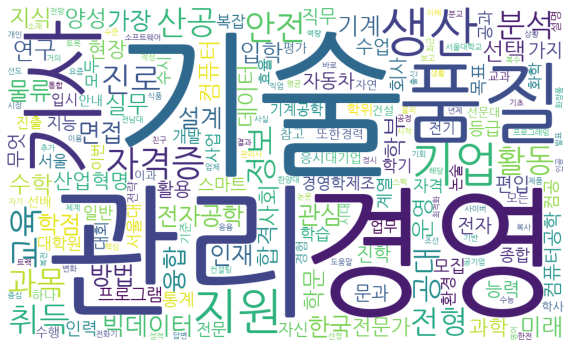

In [48]:
word_cloud(df2019)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


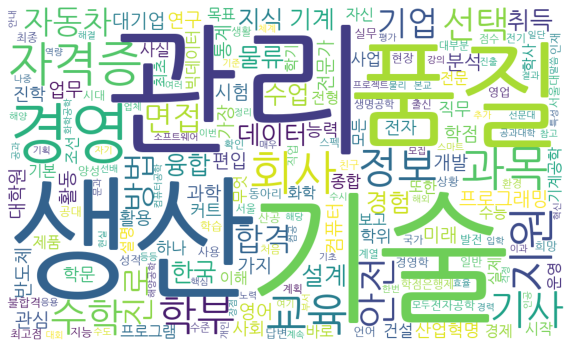

In [49]:
word_cloud(df2020)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


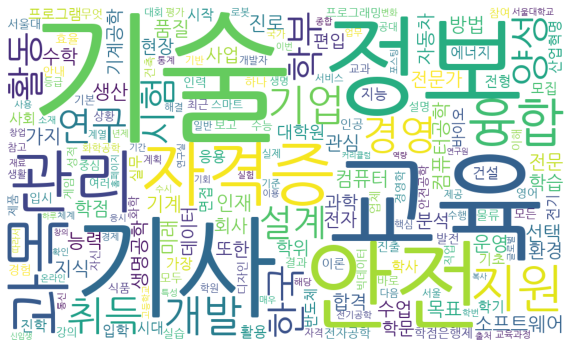

In [50]:
word_cloud(df2021)